The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.


View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.


u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.



In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [169]:
data=pd.read_csv('space.csv')
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [170]:
#move the target data to the end of the dataframe 
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')

In [171]:
df=data
df.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,STAR
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,STAR
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,GALAXY
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,STAR
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,STAR
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,0.000315,324,51666,594,STAR
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,0.100242,287,52023,559,GALAXY
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,0.000315,3306,54922,515,STAR
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,0.000089,323,51615,595,STAR
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,0.040508,288,52000,400,GALAXY


In [172]:
df.tail(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
9990,1.237650e+18,131.115570,51.447136,18.17880,16.71989,16.04004,15.66338,15.38130,1345,301,3,160,5.033570e+17,0.044909,447,51877,290,GALAXY
9991,1.237650e+18,131.113284,51.490710,18.58806,16.61418,15.62407,15.19113,14.83131,1345,301,3,160,5.011930e+17,0.096986,445,51873,609,GALAXY
9992,1.237650e+18,131.202820,51.499011,19.02614,18.13936,17.82697,17.71318,17.71018,1345,301,3,161,8.211260e+18,0.000315,7293,56741,254,STAR
9993,1.237650e+18,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,301,3,161,5.033460e+17,0.055515,447,51877,249,GALAXY
9994,1.237650e+18,131.175791,51.679675,19.52000,18.46195,18.11317,18.02245,17.99046,1345,301,3,161,8.211260e+18,-0.000056,7293,56741,259,STAR
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0.027583,447,51877,246,GALAXY
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0.117772,447,51877,228,GALAXY
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,-0.000402,7303,57013,622,STAR
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0.014019,447,51877,229,GALAXY
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,0.118417,447,51877,233,GALAXY


In [173]:
#let's check the columns
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid', 'class'],
      dtype='object')

In [174]:
#let's check the shape of data
df.shape

(10000, 18)

In [175]:
#checking the datatype
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
redshift     float64
plate          int64
mjd            int64
fiberid        int64
class         object
dtype: object

In [176]:
#check for null values
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
class        0
dtype: int64

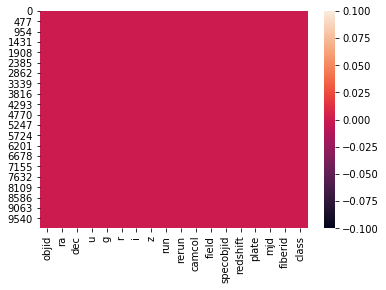

In [177]:
#it seems that no null values are present in the datset,let's sure it by checking by heatmap
sns.heatmap(df.isnull())

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  redshift   10000 non-null  float64
 14  plate      10000 non-null  int64  
 15  mjd        10000 non-null  int64  
 16  fiberid    10000 non-null  int64  
 17  class      10000 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [179]:
#summary statistics
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [180]:
df.ra.unique()

array([183.5313257, 183.5983705, 183.6802074, ..., 131.5525623,
       131.4771511, 131.6650121])

In [181]:
df.field.unique()

array([267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
       293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
       306, 307, 308, 309, 310, 311, 312, 313, 502, 503, 504, 505, 506,
       508, 509, 510, 511, 512, 515, 516, 517, 518, 519, 520, 521, 522,
       104, 105, 110, 111, 112, 113, 114, 115, 116,  25,  26,  28,  29,
        90,  91,  92,  93,  95,  74,  70,  71,  66, 103, 538, 539, 567,
       568, 571, 573, 575, 576, 579, 580, 411, 414, 415, 416, 417, 418,
       420, 421, 422, 424, 425, 426, 427, 428, 430, 431, 432, 435, 437,
       438, 439, 440, 442, 443, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 244, 245, 246, 249, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 314, 315, 316, 318, 319, 320, 321,
       322, 323, 324, 325, 326, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 581, 583, 584, 585, 591, 607, 608, 167, 169, 536, 540, 563,
       569, 570, 577, 588, 590, 598, 602, 606, 205, 446, 197, 19

In [182]:
df.count()

objid        10000
ra           10000
dec          10000
u            10000
g            10000
r            10000
i            10000
z            10000
run          10000
rerun        10000
camcol       10000
field        10000
specobjid    10000
redshift     10000
plate        10000
mjd          10000
fiberid      10000
class        10000
dtype: int64

In [183]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [184]:
#checking corelation
dcor=df.corr()
dcor

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


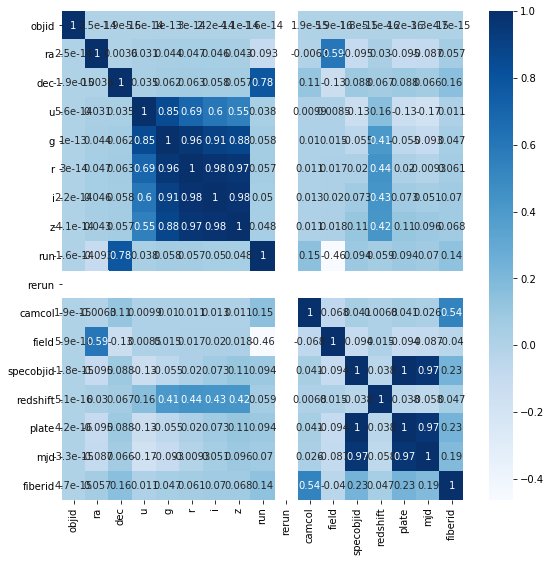

In [185]:
plt.figure(figsize=(9,9))
sns.heatmap(dcor,cmap='Blues',annot=True)

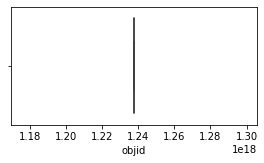

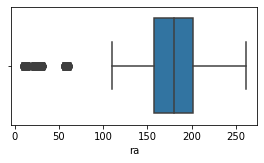

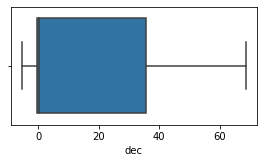

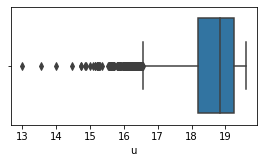

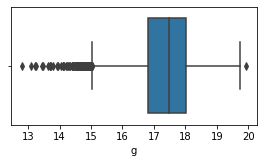

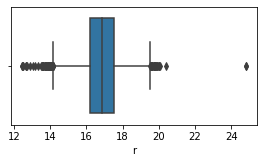

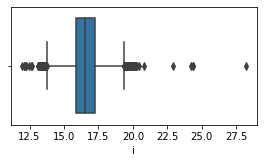

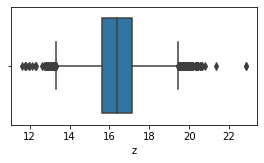

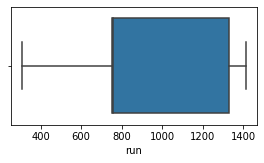

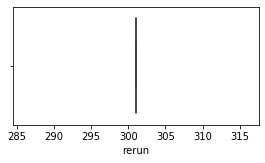

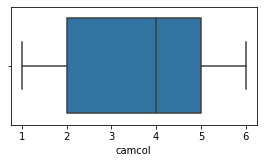

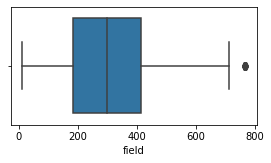

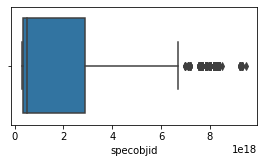

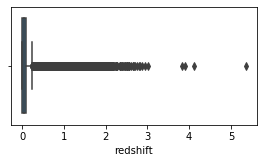

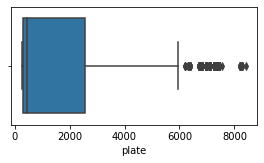

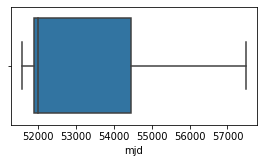

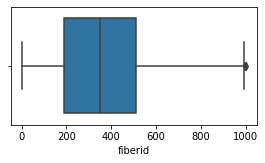

In [186]:
col_list=df.columns.values
for i in range(0,len(col_list)):
    if df[col_list[i]].dtypes!='O':
        plt.figure(figsize=(15,10))
        plt.subplot(4,3,2)
        sns.boxplot(df[col_list[i]])
        plt.show()

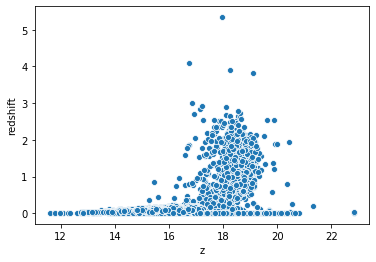

In [187]:
sns.scatterplot(x='z',y='redshift',data=df)

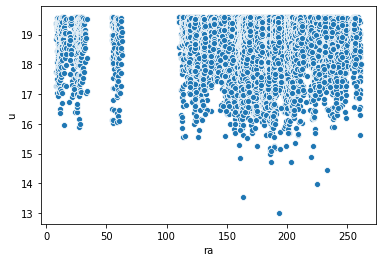

In [188]:
sns.scatterplot(x='ra',y='u',data=df)

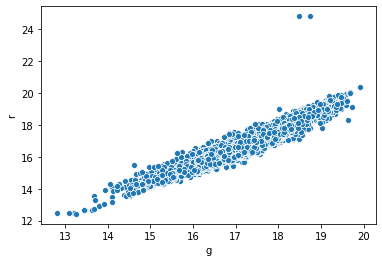

In [189]:
sns.scatterplot(x='g',y='r',data=df)

In [190]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['class']= label_encoder.fit_transform(df['class'])
df['class'].unique() 




  

array([2, 0, 1])

In [191]:
df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
class        0.169292
dtype: float64

In [192]:
df.drop(['ra', 'u','r','g','camcol','dec'], axis=1, inplace=True)

In [193]:
#separating the input and target variables before using the scaler
x=df.iloc[:,0:-1]
y=pd.DataFrame(df.iloc[:,-1])
print(x.shape)
print(y.shape)
x.head()

(10000, 11)
(10000, 1)


,objid,i,z,run,rerun,field,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,15.50342,15.22531,752,301,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,16.48922,16.39150,752,301,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,17.08732,16.80125,752,301,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,15.98233,15.90438,752,301,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,16.55492,16.61326,752,301,269,3.722370e+18,0.000590,3306,54922,512


In [194]:
y.head()

,class
0,2
1,2
2,0
3,2
4,2


In [195]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.219081,0.322108,0.402174,0.0,0.338177,0.373289,0.000770,0.373281,0.566492,0.490490
1,0.0,0.279811,0.426021,0.402174,0.0,0.338177,0.007006,0.000762,0.006999,0.006268,0.540541
2,0.0,0.316657,0.462532,0.402174,0.0,0.339498,0.002584,0.023749,0.002579,0.075385,0.512513
3,0.0,0.248584,0.382616,0.402174,0.0,0.340819,0.373290,0.000751,0.373281,0.566492,0.509510
4,0.0,0.283858,0.445782,0.402174,0.0,0.340819,0.373290,0.000882,0.373281,0.566492,0.511512


#Since the problem is classification type, we need to implement classification algorithms for the same

In [196]:
df.isna().sum()

objid        0
i            0
z            0
run          0
rerun        0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
class        0
dtype: int64

In [197]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def max_accuracy(reg,x,y):
    max_acc_score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score achieved at r state", r_state, "is", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy", max_acc_score, "is achieved at random state", final_r_state)
    return max_acc_score

In [198]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
max_accuracy(mb,x,y)

The accuracy score achieved at r state 42 is 0.7825
The accuracy score achieved at r state 43 is 0.805
The accuracy score achieved at r state 44 is 0.792
The accuracy score achieved at r state 45 is 0.8125
The accuracy score achieved at r state 46 is 0.8055
The accuracy score achieved at r state 47 is 0.7795
The accuracy score achieved at r state 48 is 0.799
The accuracy score achieved at r state 49 is 0.803
The accuracy score achieved at r state 50 is 0.8095
The accuracy score achieved at r state 51 is 0.8
The accuracy score achieved at r state 52 is 0.7955
The accuracy score achieved at r state 53 is 0.7895
The accuracy score achieved at r state 54 is 0.79
The accuracy score achieved at r state 55 is 0.792
The accuracy score achieved at r state 56 is 0.802
The accuracy score achieved at r state 57 is 0.8175
The accuracy score achieved at r state 58 is 0.7845
The accuracy score achieved at r state 59 is 0.8065
The accuracy score achieved at r state 60 is 0.798
The accuracy score achie

0.8175

In [203]:
#splitting the test and training data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=57,test_size=0.20)

In [204]:
#Checking the best parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

mb=MultinomialNB()
parameters={'alpha':(0,0.001,0.01,0.1,1)}
gdmb=GridSearchCV(mb,parameters)
gdmb.fit(train_x,train_y)
gdmb.best_params_

{'alpha': 0}

In [205]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [206]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'poly'}

In [207]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [208]:
#After obtaining best parameters, we should now check the models

In [212]:
score=[]
cv=[]
roc=[]

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer

algorithms=[KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='distance'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=10, kernel='poly'),MultinomialNB(alpha=0)]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    lb=LabelBinarizer()
    y_test=lb.fit_transform(test_y)
    predy=lb.fit_transform(pred)
    rocscore=roc_auc_score(y_test,predy)
    roc.append(rocscore)
    print("The roc auc score is", rocscore)
    print("\n")
    print("\n")
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

The accuracy score is  0.903

The cross val score is 0.8665

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1023
           1       0.97      0.81      0.88       173
           2       0.93      0.85      0.89       804

    accuracy                           0.90      2000
   macro avg       0.93      0.87      0.90      2000
weighted avg       0.91      0.90      0.90      2000


[[980   2  41]
 [ 19 140  14]
 [116   2 686]]

The roc auc score is 0.9056825083985403




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, mi

In [213]:
result=pd.DataFrame({'Model':[KNeighborsClassifier, DecisionTreeClassifier, SVC,MultinomialNB],'Accuracy_Score':score,'Cross_val_score':cv, 'roc-auc score': roc})
result

,Model,Accuracy_Score,Cross_val_score,roc-auc score
0,<class 'sklearn.neighbors._classification.KNei...,0.903,0.8665,0.905683
1,<class 'sklearn.tree._classes.DecisionTreeClas...,0.990,0.9794,0.985576
2,<class 'sklearn.svm._classes.SVC'>,0.976,0.9737,0.969386
3,<class 'sklearn.naive_bayes.MultinomialNB'>,0.818,0.7996,0.738889


In [214]:
#saving the model
from sklearn.externals import joblib
joblib.dump(dt,"spaceserver.pkl")

['spaceserver.pkl']